In [226]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
from pylab import rcParams

In [166]:
stats = ['weak axiom','axiom score','approval','utility']
with open('eq_dict.pkl', "rb") as f:
    eq_dict = pickle.load(f)
with open('max_dict.pkl', "rb") as f:
    max_dict = pickle.load(f)
with open('greedy_dict.pkl', "rb") as f:
    greedy_dict = pickle.load(f)
    
with open('eq_dict_gen.pkl', "rb") as f:
    eq_dict_gen = pickle.load(f)
with open('max_dict_gen.pkl', "rb") as f:
    max_dict_gen = pickle.load(f)
with open('greedy_dict_gen.pkl', "rb") as f:
    greedy_dict_gen = pickle.load(f)

In [188]:
data = {r'relative score vs $F_{GA}$':[], 'mechanism':[], 'metric':[], 'real data':[]}

stat = stats[1] 
tmp = np.array(greedy_dict_gen[stat])
data[r'relative score vs $F_{GA}$'] += list(tmp / np.array(max_dict_gen[stat]))
data['mechanism'] += [r'$F_{MA}$'] * len(tmp)
data['metric'] += ['JS distance'] * len(tmp)
data['real data'] += [False] * len(tmp)
data[r'relative score vs $F_{GA}$'] += list(tmp / np.array(eq_dict_gen[stat]))
data['mechanism'] += [r'$F_{EQ}$'] * len(tmp)
data['metric'] += ['JS distance'] * len(tmp)
data['real data'] += [False] * len(tmp)
for stat in stats[2:]:
    tmp = np.array(greedy_dict_gen[stat])
    data[r'relative score vs $F_{GA}$'] += list(np.array(max_dict_gen[stat]) / tmp)
    data['mechanism'] += [r'$F_{MA}$'] * len(tmp)
    data['metric'] += [stat] * len(tmp)
    data['real data'] += [False] * len(tmp)
    data[r'relative score vs $F_{GA}$'] += list(np.array(eq_dict_gen[stat]) / tmp)
    data['mechanism'] += [r'$F_{EQ}$'] * len(tmp)
    data['metric'] += [stat] * len(tmp)
    data['real data'] += [False] * len(tmp)

stat = stats[1] 
tmp = np.array(greedy_dict[stat])
data[r'relative score vs $F_{GA}$'] += list(tmp / np.array(max_dict[stat]))
data['mechanism'] += [r'$F_{MA}$'] * len(tmp)
data['metric'] += ['JS distance'] * len(tmp)
data['real data'] += [True] * len(tmp)
data[r'relative score vs $F_{GA}$'] += list(tmp / np.array(eq_dict[stat]))
data['mechanism'] += [r'$F_{EQ}$'] * len(tmp)
data['metric'] += ['JS distance'] * len(tmp)
data['real data'] += [True] * len(tmp)
for stat in stats[2:]:
    tmp = np.array(greedy_dict[stat])
    data[r'relative score vs $F_{GA}$'] += list(np.array(max_dict[stat]) / tmp)
    data['mechanism'] += [r'$F_{MA}$'] * len(tmp)
    data['metric'] += [stat] * len(tmp)
    data['real data'] += [True] * len(tmp)
    data[r'relative score vs $F_{GA}$'] += list(np.array(eq_dict[stat]) / tmp)
    data['mechanism'] += [r'$F_{EQ}$'] * len(tmp)
    data['metric'] += [stat] * len(tmp)
    data['real data'] += [True] * len(tmp)

    
df = pd.DataFrame(data=data)

In [297]:
sns.set_theme(style="whitegrid")
# sns.set_context("talk")
sns.set_context("poster")
# sns.set_context("paper")
sns.set_style("ticks", {'xtick.color': '0', 
                        'axes.grid':True, 
                        'grid.color': '.6',
                        'axes.labelcolor':'0',
                        'text.color':'0',
                        'ytick.color': '0',
                        'ytick.left': False})
rcParams['figure.figsize'] = 16, 7
rcParams['figure.dpi'] = 100
rcParams.update({'font.size': 20})

dir(sns)
sns.axes_style()
# dir(sns.axisgrid)
# # sns.axisgrid.Grid


{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '0',
 'figure.facecolor': 'white',
 'grid.color': '.6',
 'grid.linestyle': '-',
 'text.color': '0',
 'xtick.color': '0',
 'ytick.color': '0',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

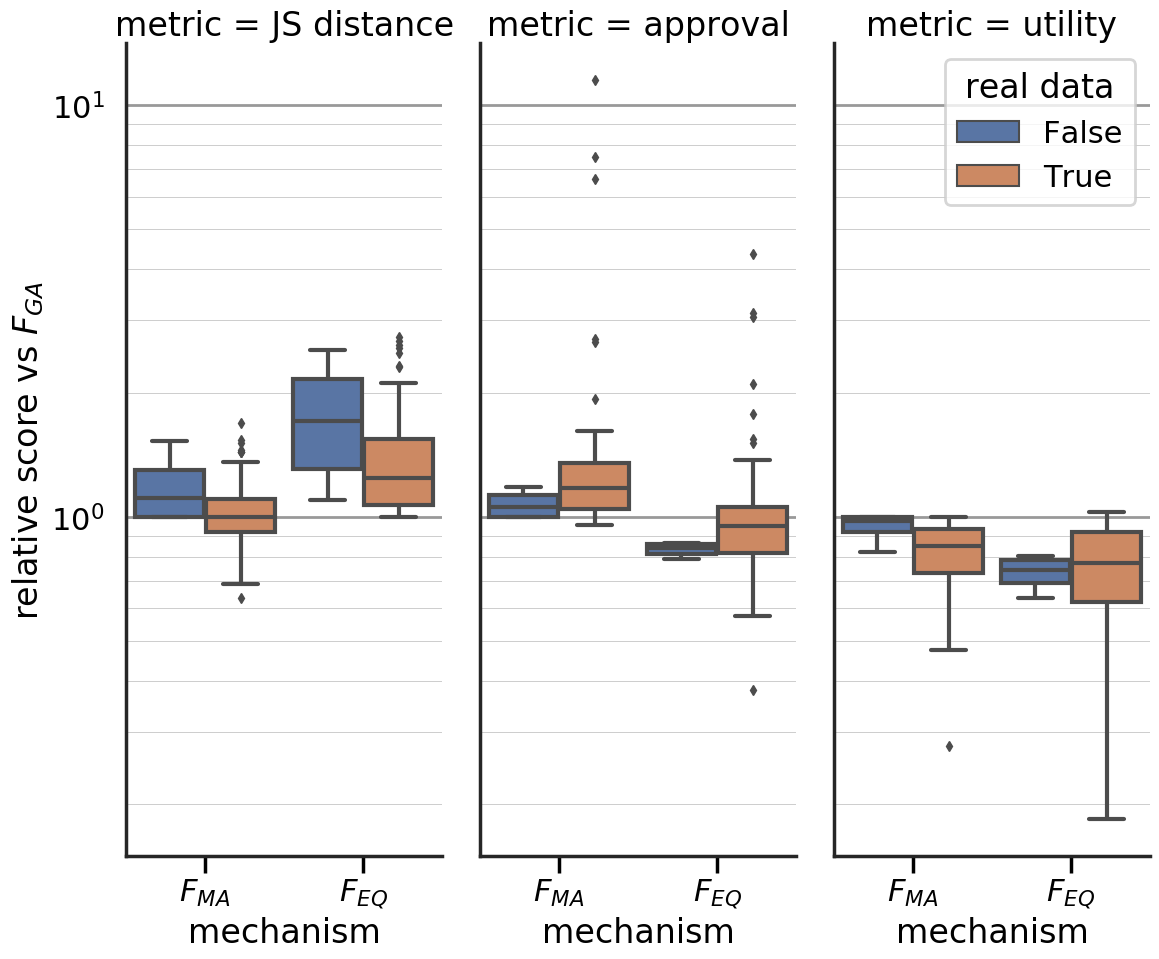

In [301]:
g = sns.catplot(x="mechanism", y=r'relative score vs $F_{GA}$',
                hue="real data", col="metric",
                data=df, kind="box",
                height=10, aspect=.4, width=0.9,
                palette="deep", legend=False);
g.set(yscale="log")
g.tight_layout()
for ax in g.axes[0]:
    ax.grid(b=True, which='minor', color='k', linewidth=0.5, alpha=0.3)
plt.legend(loc='upper right',title='real data')
plt.show()